# TEXT MINING PROJECT - GENDER POLITICS



In [ ]:
import pandas as pd
import numpy as np

from tqdm import tqdm
tqdm.pandas()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/gender/')

In [ ]:
%cd "/content/drive/My Drive/Colab Notebooks/gender/"

/content/drive/My Drive/Colab Notebooks/gender


## Gender classification

In [ ]:
df_speeches = pd.read_csv("discorsi_cleaned.csv")

In [ ]:
df_speeches.head()

,convocationid,deputy,text,gender
0,14593,VIVIANI LUCIANA,onorevole mini stro rivolgo visto d onorevoli ...,1
1,14593,SCELBA,minis t ro interno mini stero interno entra af...,0
2,14593,VIVIANI LUCIANA,circolare co munque emanata ministero interno ...,1
3,14593,SCELBA,mini s t ro interno vigore tutte funzioni pass...,0
4,14593,VIVIANI LUCIANA,passaggio av venuto molto recentemente determi...,1


In [ ]:
df_speeches.dropna(subset=["text"], inplace=True)

In [ ]:
df_speeches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352397 entries, 0 to 352744
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   convocationid  352397 non-null  int64 
 1   deputy         352397 non-null  object
 2   text           352397 non-null  object
 3   gender         352397 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 13.4+ MB


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(min_df = 0.001)
X = vectorizer.fit_transform(df_speeches.text)

In [ ]:
X.shape

(352397, 12546)

In [ ]:
y = df_speeches.gender.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((281917, 12546), (70480, 12546))

In [ ]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(n_jobs=-1, verbose=10, class_weight='balanced')
clf.fit(X_train, y_train)

-- Epoch 1
Norm: 30.26, NNZs: 12546, Bias: -0.698277, T: 281917, Avg. loss: 0.503776
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 29.80, NNZs: 12546, Bias: -0.708408, T: 563834, Avg. loss: 0.458714
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 29.70, NNZs: 12546, Bias: -0.709989, T: 845751, Avg. loss: 0.452387
Total training time: 0.50 seconds.
-- Epoch 4
Norm: 29.62, NNZs: 12546, Bias: -0.703327, T: 1127668, Avg. loss: 0.449371
Total training time: 0.67 seconds.
-- Epoch 5
Norm: 29.58, NNZs: 12546, Bias: -0.709229, T: 1409585, Avg. loss: 0.448822
Total training time: 0.83 seconds.
-- Epoch 6
Norm: 29.60, NNZs: 12546, Bias: -0.701477, T: 1691502, Avg. loss: 0.446782
Total training time: 1.01 seconds.
-- Epoch 7
Norm: 29.52, NNZs: 12546, Bias: -0.708760, T: 1973419, Avg. loss: 0.447430
Total training time: 1.18 seconds.
-- Epoch 8
Norm: 29.54, NNZs: 12546, Bias: -0.708738, T: 2255336, Avg. loss: 0.446894
Total training time: 1.34 seconds.
-- Epoch 9
Norm: 29.53, NNZs: 12546

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=10, warm_start=False)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.8094636776390466,
 0.34290363826572123,
 0.7353857659229714,
 0.467715723968449)

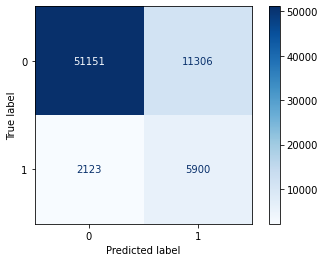

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', values_format='')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_cat = np.reshape(y, (-1,1))
y_cat = ohe.fit_transform(y_cat).toarray()

In [ ]:
vocabulary_size = 200
max_features = 200
batch_size = 256
embedding_dims = 50
filters = 200
kernel_size = 3
epochs = 10

In [ ]:
df_sampled = df_speeches.sample(150000)

In [ ]:
df_sampled.reset_index(inplace=True)

In [ ]:
y = df_sampled.gender.values

ohe = OneHotEncoder()
y_cat = np.reshape(y, (-1,1))
y_cat = ohe.fit_transform(y_cat).toarray()

In [ ]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from nltk.tokenize import word_tokenize

embedded_sentences = [one_hot(sp, vocabulary_size) for sp in tqdm(df_sampled.text)]

100%|██████████| 150000/150000 [00:23<00:00, 6503.75it/s]


In [ ]:
df_sampled['len'] = df_sampled.text.progress_apply(lambda x: len(x.split()))

100%|██████████| 150000/150000 [00:02<00:00, 74281.43it/s]


In [ ]:
length_long_sentence = 200

In [ ]:
padded_sentences = pad_sequences(embedded_sentences, length_long_sentence, padding='post')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(padded_sentences,y_cat,test_size = 0.2)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.2)

In [ ]:
import tensorflow as tf
import tensorflow.keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Input, Embedding, LSTM, Dense, Dropout, Flatten, Conv1D, GlobalMaxPooling1D, BatchNormalization, Activation
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences

In [ ]:
def compute_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision + recall + K.epsilon())
    return f1_val

In [ ]:
# set parameters:
import tensorflow as tf

def get_cnn(length_long_sentence):
    with tf.device('/device:GPU:0'):
        model = Sequential()

# we start off with an efficient embedding layer which maps our vocab indices into embedding_dims dimensions
        model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=length_long_sentence))
        model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters word group filters of size filter_length:
        model.add(Conv1D(filters,
                 kernel_size,
                 padding='same',
                 strides=1))
        model.add(Activation('relu'))
        model.add(Conv1D(filters,
                 kernel_size,
                 padding='same',
                 strides=1))
        model.add(Activation('relu'))
# we use max pooling:
        model.add(GlobalMaxPooling1D())
        model.add(Flatten())

# We project onto a single unit output layer, and squash it with a softmax:
        model.add(Dense(y_train.shape[1]))
        model.add(Activation('sigmoid'))

        model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', compute_f1])
        return model

In [ ]:
es = EarlyStopping(monitor='loss', verbose=1, mode='min', patience = 2, min_delta=0.01)

In [ ]:
model = get_cnn(length_long_sentence)

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1668664810775752479, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12522025565463159435
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 9941112853334303106
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11146783616
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 11406022958878802582
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [ ]:
history = model.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          validation_data=(X_val, y_val),
          callbacks=[es])

Epoch 1/10
375/375 [==============================] - 25s 66ms/step - loss: 0.3522 - accuracy: 0.8832 - compute_f1: 0.8831 - val_loss: 0.3182 - val_accuracy: 0.8869 - val_compute_f1: 0.8869
Epoch 2/10
375/375 [==============================] - 24s 64ms/step - loss: 0.3056 - accuracy: 0.8916 - compute_f1: 0.8917 - val_loss: 0.2936 - val_accuracy: 0.9009 - val_compute_f1: 0.9010
Epoch 3/10
375/375 [==============================] - 24s 64ms/step - loss: 0.2905 - accuracy: 0.8997 - compute_f1: 0.8996 - val_loss: 0.2819 - val_accuracy: 0.9055 - val_compute_f1: 0.9056
Epoch 4/10
375/375 [==============================] - 24s 63ms/step - loss: 0.2787 - accuracy: 0.9038 - compute_f1: 0.9038 - val_loss: 0.2764 - val_accuracy: 0.9070 - val_compute_f1: 0.9070
Epoch 5/10
375/375 [==============================] - 24s 64ms/step - loss: 0.2730 - accuracy: 0.9051 - compute_f1: 0.9051 - val_loss: 0.2754 - val_accuracy: 0.9074 - val_compute_f1: 0.9075
Epoch 6/10
375/375 [==============================

In [ ]:
scores = model.evaluate(X_test, y_test) 
print('Test accuracy:', scores[1])
print('Test F1 score:', scores[2])

938/938 [==============================] - 5s 6ms/step - loss: 0.2728 - accuracy: 0.9068 - compute_f1: 0.9068
Test accuracy: 0.9067999720573425
Test F1 score: 0.9067952632904053


In [ ]:
model.save("cnn.h5")